# Linear Regression on Automobiles

In [ ]:
!pip install ucimlrepo

In [ ]:
#importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
print(automobile.variables)

                 name     role         type demographic  \
0               price  Feature   Continuous        None   
1         highway-mpg  Feature   Continuous        None   
2            city-mpg  Feature   Continuous        None   
3            peak-rpm  Feature   Continuous        None   
4          horsepower  Feature   Continuous        None   
5   compression-ratio  Feature   Continuous        None   
6              stroke  Feature   Continuous        None   
7                bore  Feature   Continuous        None   
8         fuel-system  Feature  Categorical        None   
9         engine-size  Feature   Continuous        None   
10   num-of-cylinders  Feature      Integer        None   
11        engine-type  Feature  Categorical        None   
12        curb-weight  Feature   Continuous        None   
13             height  Feature   Continuous        None   
14              width  Feature   Continuous        None   
15             length  Feature   Continuous        None 

In [ ]:
print(automobile.data.columns)

None


In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
automobile = fetch_ucirepo(id=10)

if automobile is None:
    print("Error: Dataset loading failed.")
else:
    print("Dataset loaded successfully.")

Dataset loaded successfully.


# Loading the dataset

In [ ]:
automobile = fetch_ucirepo(id=10)
X = automobile.data.features
y = automobile.data.target

#Data Wrangling

In [ ]:
#checks for missing values
print(new_X.isnull().sum())

price                    4
highway-mpg              0
city-mpg                 0
peak-rpm                 2
horsepower               2
                        ..
make_toyota              0
make_volkswagen          0
make_volvo               0
engine-location_front    0
engine-location_rear     0
Length: 68, dtype: int64


In [ ]:
#encodes categorical variables
new_X = pd.get_dummies(X, columns=['fuel-system', 'engine-type', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make', 'engine-location'])

print(new_X.shape)
print(new_X.dtypes)

(205, 68)
price                    float64
highway-mpg                int64
city-mpg                   int64
peak-rpm                 float64
horsepower               float64
                          ...   
make_toyota                 bool
make_volkswagen             bool
make_volvo                  bool
engine-location_front       bool
engine-location_rear        bool
Length: 68, dtype: object


**Feature Scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = new_X.select_dtypes(include=['float64', 'int64']).columns
X_scaled = new_X.copy()
X_scaled[numeric_columns] = scaler.fit_transform(new_X[numeric_columns])

#Data Exploration

In [ ]:
X.describe()

price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count    201.000000   205.000000  205.000000   203.000000  203.000000   
mean   13207.129353    30.751220   25.219512  5125.369458  104.256158   
std     7947.066342     6.886443    6.542142   479.334560   39.714369   
min     5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%     7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%    10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%    16500.000000    34.000000   30.000000  5500.000000  116.000000   
max    45400.000000    54.000000   49.000000  6600.000000  288.000000   

       compression-ratio      stroke        bore  engine-size  \
count         205.000000  201.000000  201.000000   205.000000   
mean           10.142537    3.255423    3.329751   126.907317   
std             3.972040    0.316717    0.273539    41.642693   
min             7.000000    2.070000    2.540000    61.000000   
25%             8.600000    3.110000    3.150000    97.000000   
50%             9.000000    3.290000    3.310000   120.000000   
75%             9.400000    3.410000    3.590000   141.000000   
max            23.000000    4.170000    3.940000   326.000000   

       num-of-cylinders  curb-weight      height       width      length  \
count        205.000000   205.000000  205.000000  205.000000  205.000000   
mean           4.380488  2555.565854   53.724878   65.907805  174.049268   
std            1.080854   520.680204    2.443522    2.145204   12.337289   
min            2.000000  1488.000000   47.800000   60.300000  141.100000   
25%            4.000000  2145.000000   52.000000   64.100000  166.300000   
50%            4.000000  2414.000000   54.100000   65.500000  173.200000   
75%            4.000000  2935.000000   55.500000   66.900000  183.100000   
max           12.000000  4066.000000   59.800000   72.300000  208.100000   

       wheel-base  num-of-doors  normalized-losses  
count  205.000000    203.000000         164.000000  
mean    98.756585      3.123153         122.000000  
std      6.021776      0.994841          35.442168  
min     86.600000      2.000000          65.000000  
25%     94.500000      2.000000          94.000000  
50%     97.000000      4.000000         115.000000  
75%    102.400000      4.000000         150.000000  
max    120.900000      4.000000         256.000000

price                    float64
highway-mpg                int64
city-mpg                   int64
peak-rpm                 float64
horsepower               float64
                          ...   
make_toyota                 bool
make_volkswagen             bool
make_volvo                  bool
engine-location_front       bool
engine-location_rear        bool
Length: 68, dtype: object


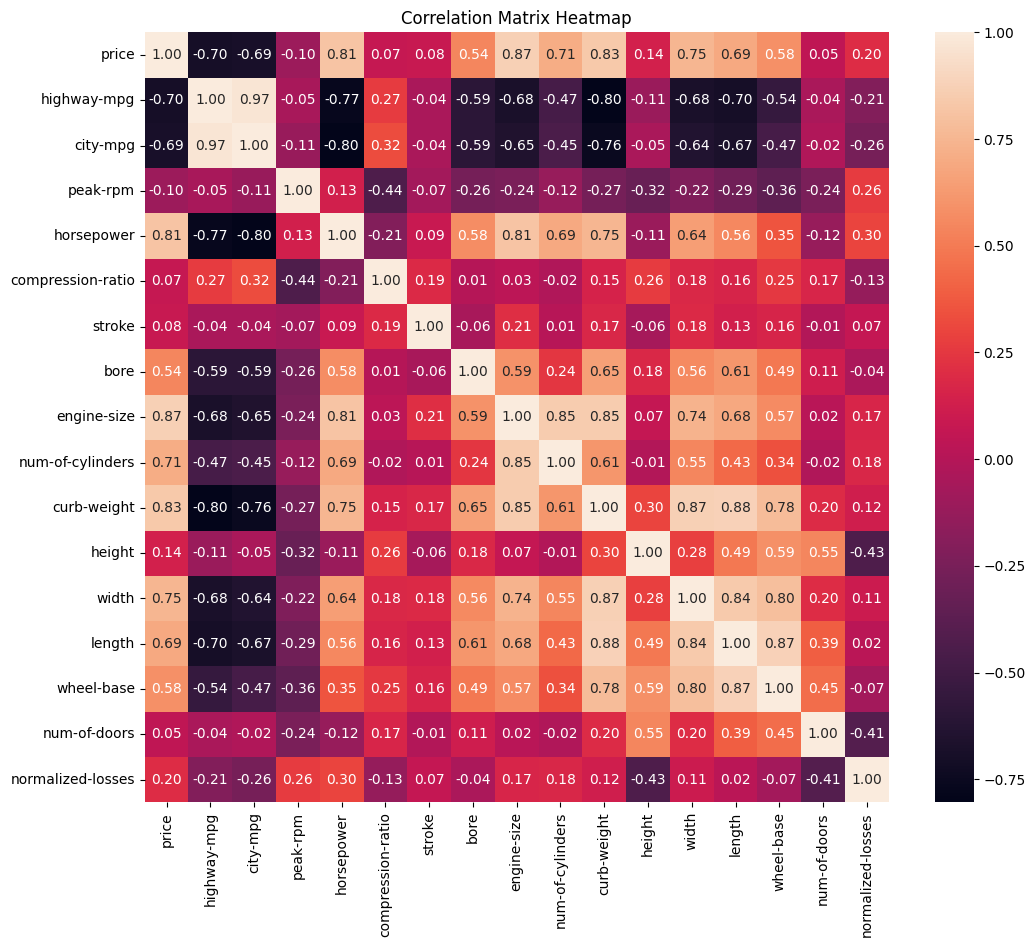

In [ ]:
#correlatiioin analysis
print(new_X.dtypes)

data_numeric = new_X.select_dtypes(include=['float64', 'int64'])

correlation_matrix = data_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#Simple Linear Regression

**Split Data into Training and Testing Sets:**

In [ ]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

NameError: name 'X_encoded' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

**Fit Linear Regression Model:**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.6859129086119733
R-squared: 0.5320537340191854


# Logistic Regression on Wine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

#Loading the dataset

In [ ]:
wine = pd.DataFrame(data=X, columns=wine.variables['name'][1:])
wine['class'] = y

#Data Exploration

In [ ]:
print(wine.head())
print(wine.describe())
print(wine.info())

name  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0       14.23       1.71  2.43               15.6        127           2.80   
1       13.20       1.78  2.14               11.2        100           2.65   
2       13.16       2.36  2.67               18.6        101           2.80   
3       14.37       1.95  2.50               16.8        113           3.85   
4       13.24       2.59  2.87               21.0        118           2.80   

name  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
0           3.06                  0.28             2.29             5.64   
1           2.76                  0.26             1.28             4.38   
2           3.24                  0.30             2.81             5.68   
3           3.49                  0.24             2.18             7.80   
4           2.69                  0.39             1.82             4.32   

name   Hue  0D280_0D315_of_diluted_wines  Proline  class  
0     1.0

#Data Visualization

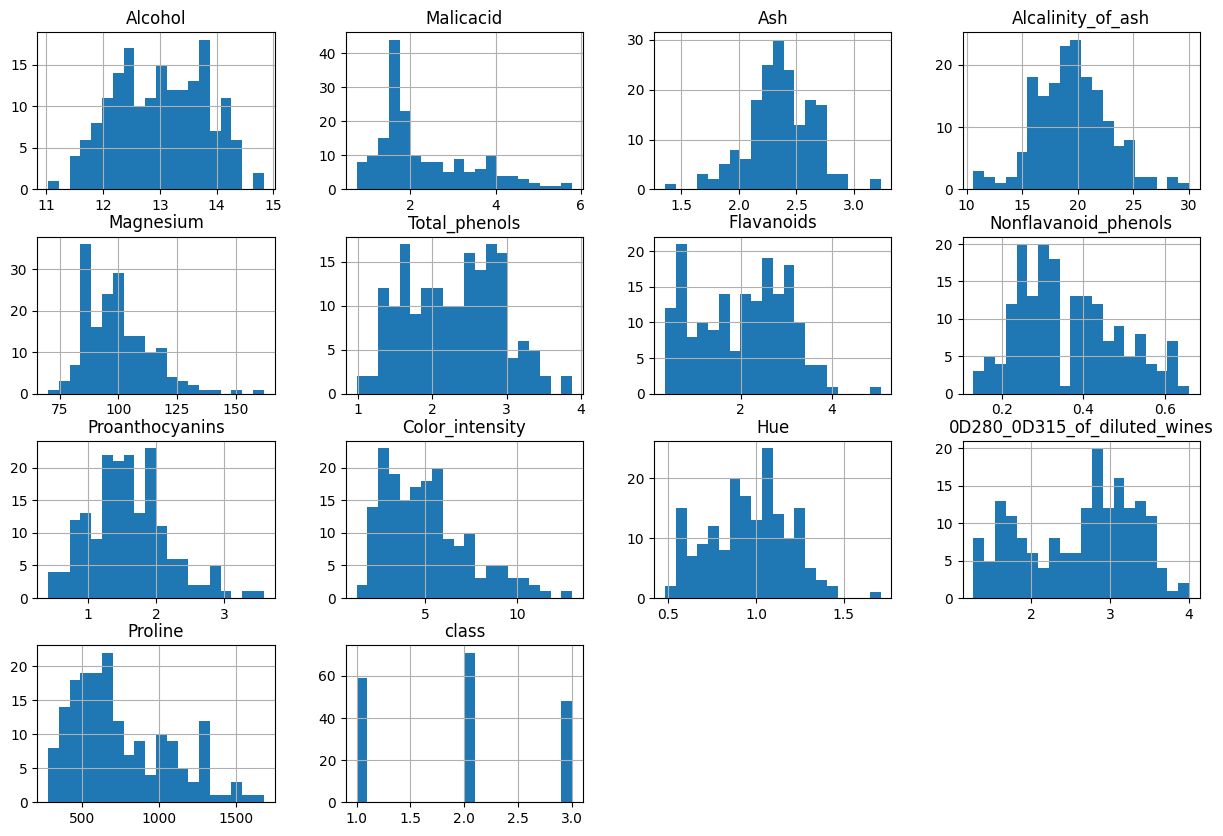

In [ ]:
wine.hist(bins=20, figsize=(15, 10))
plt.show()

**visualize relationships between features**

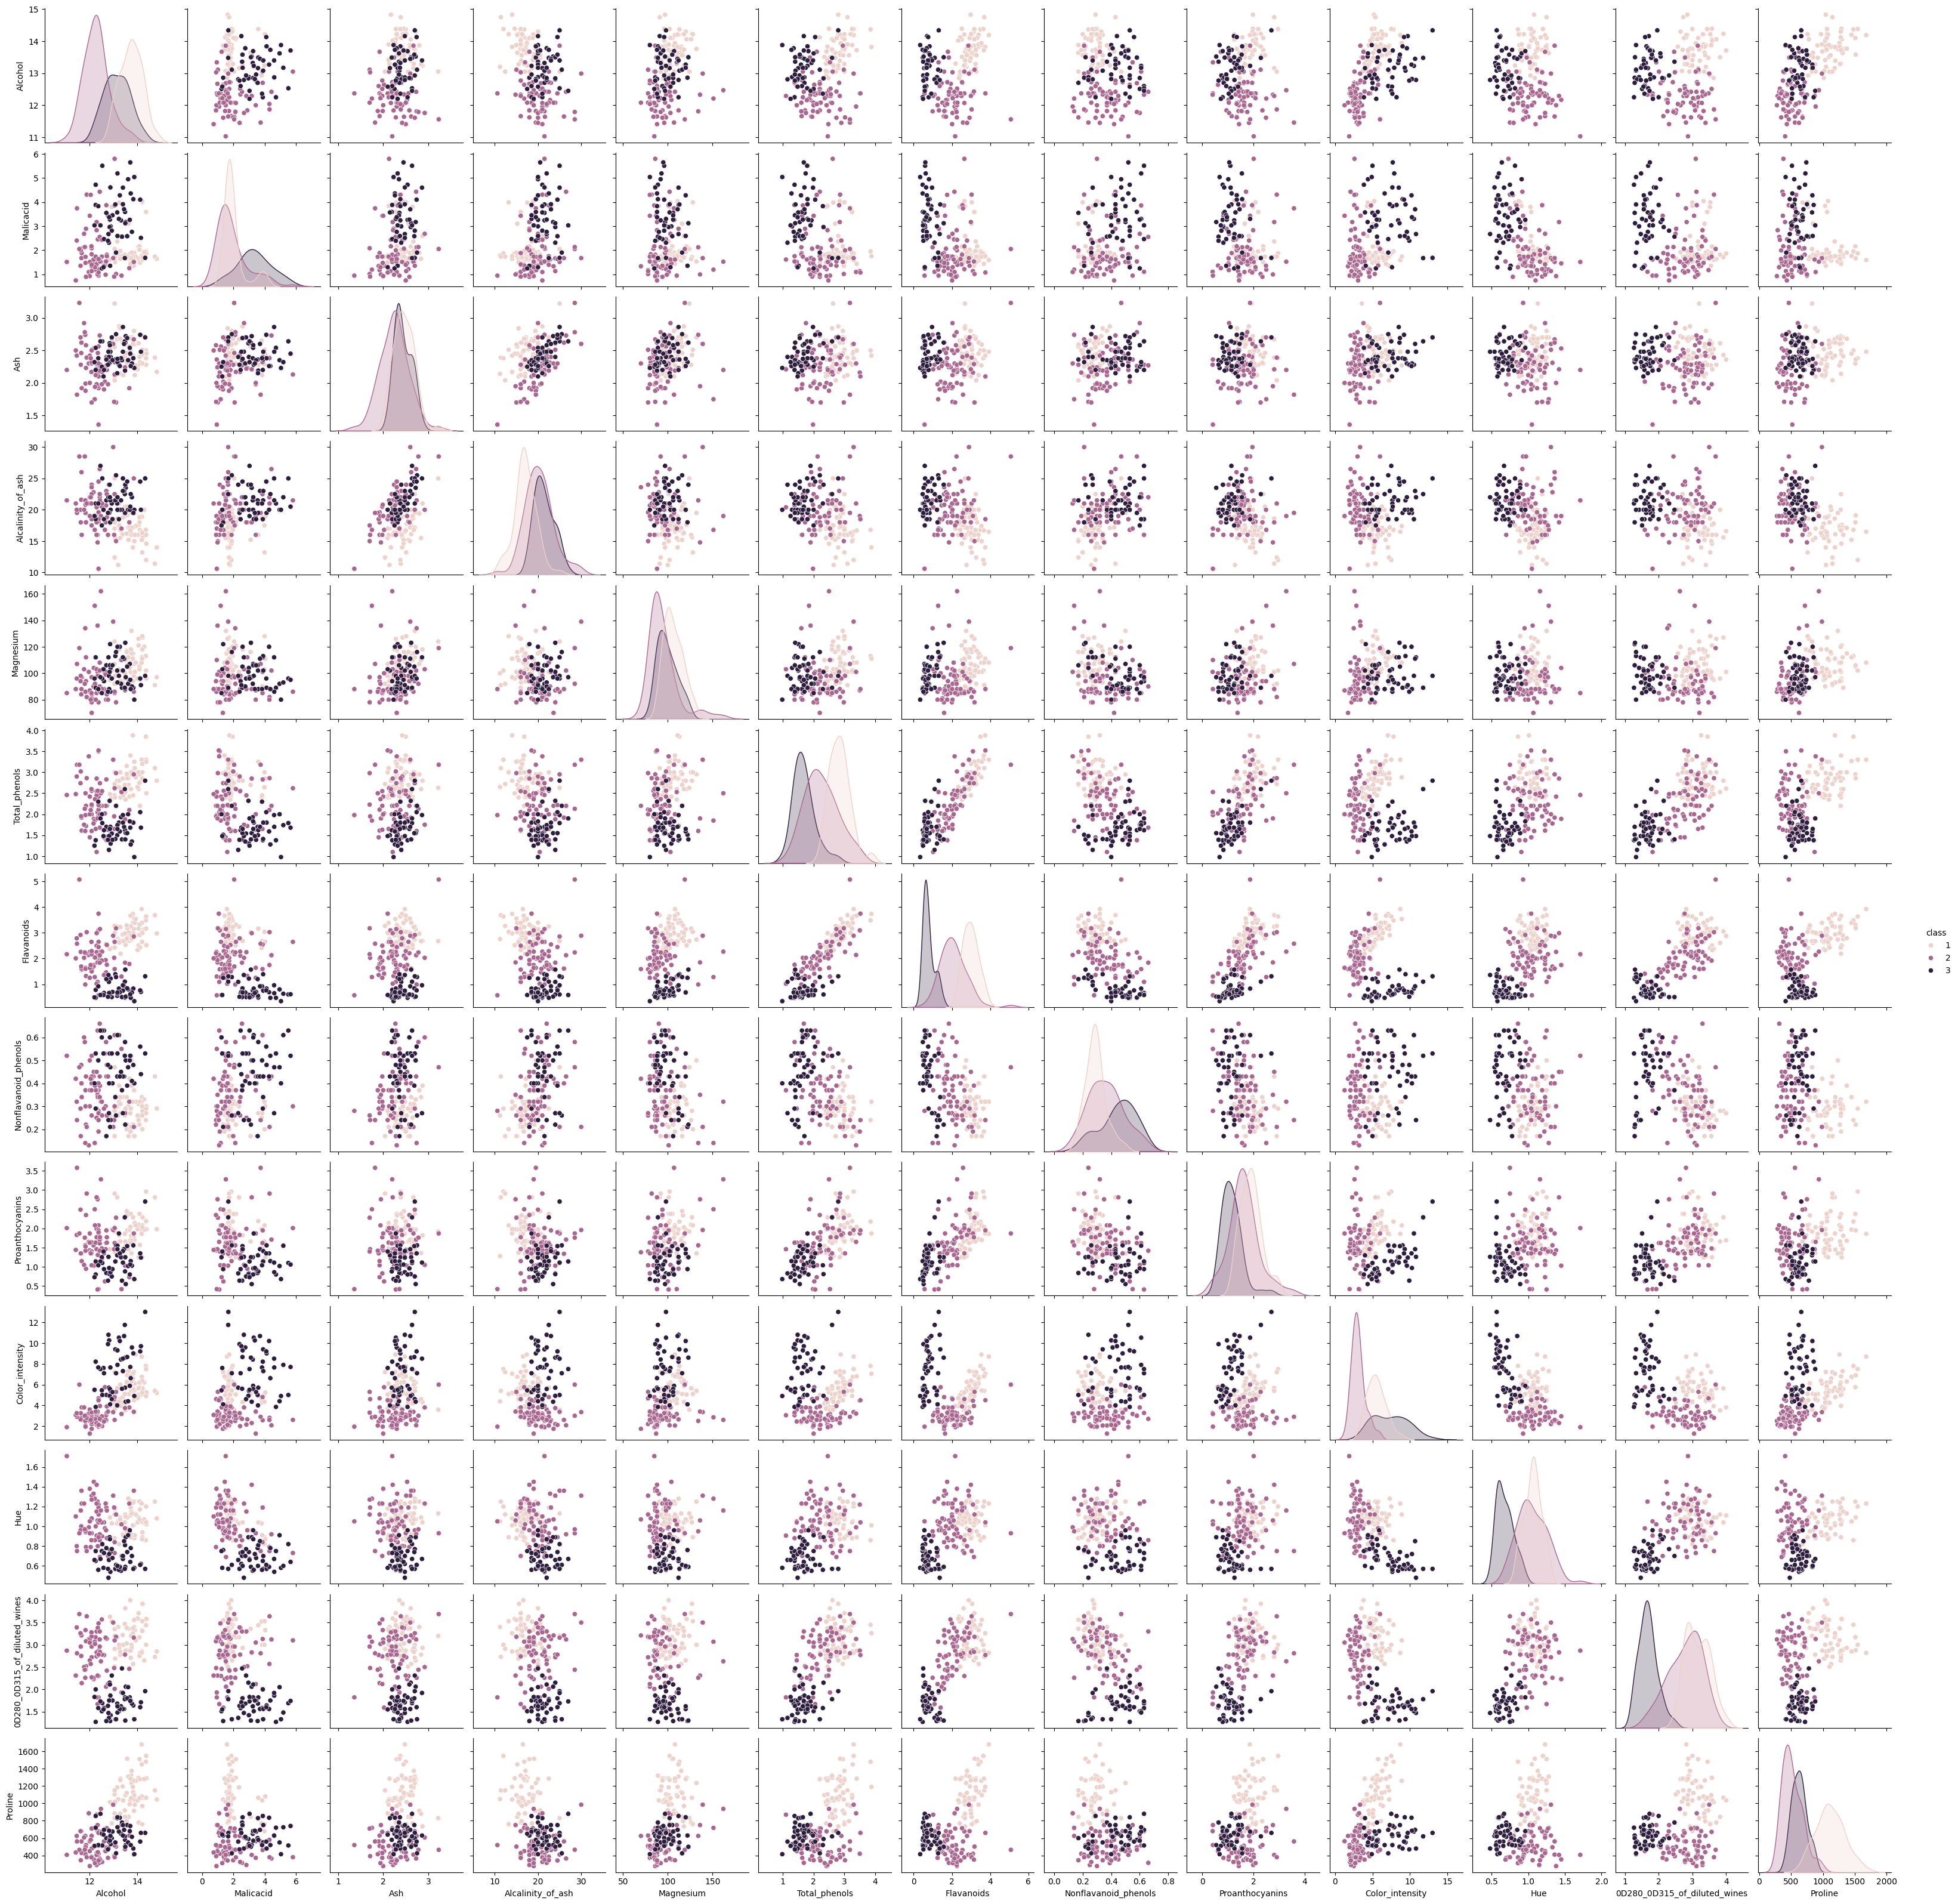

In [ ]:
sns.pairplot(wine, hue='class')
plt.show()

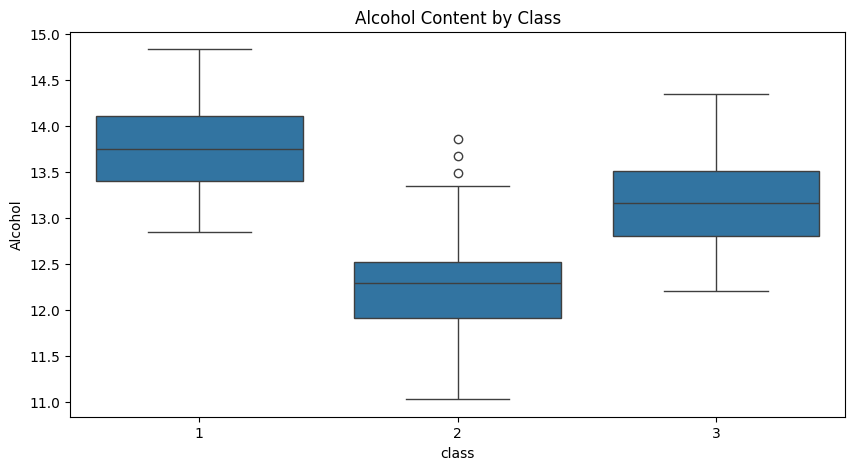

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='class', y='Alcohol', data=wine)
plt.title('Alcohol Content by Class')
plt.show()

#Data Pre-processing

In [ ]:
wine.isnull().sum()

name
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [ ]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine.drop('class', axis=1))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine['class'] = le.fit_transform(wine['class'])

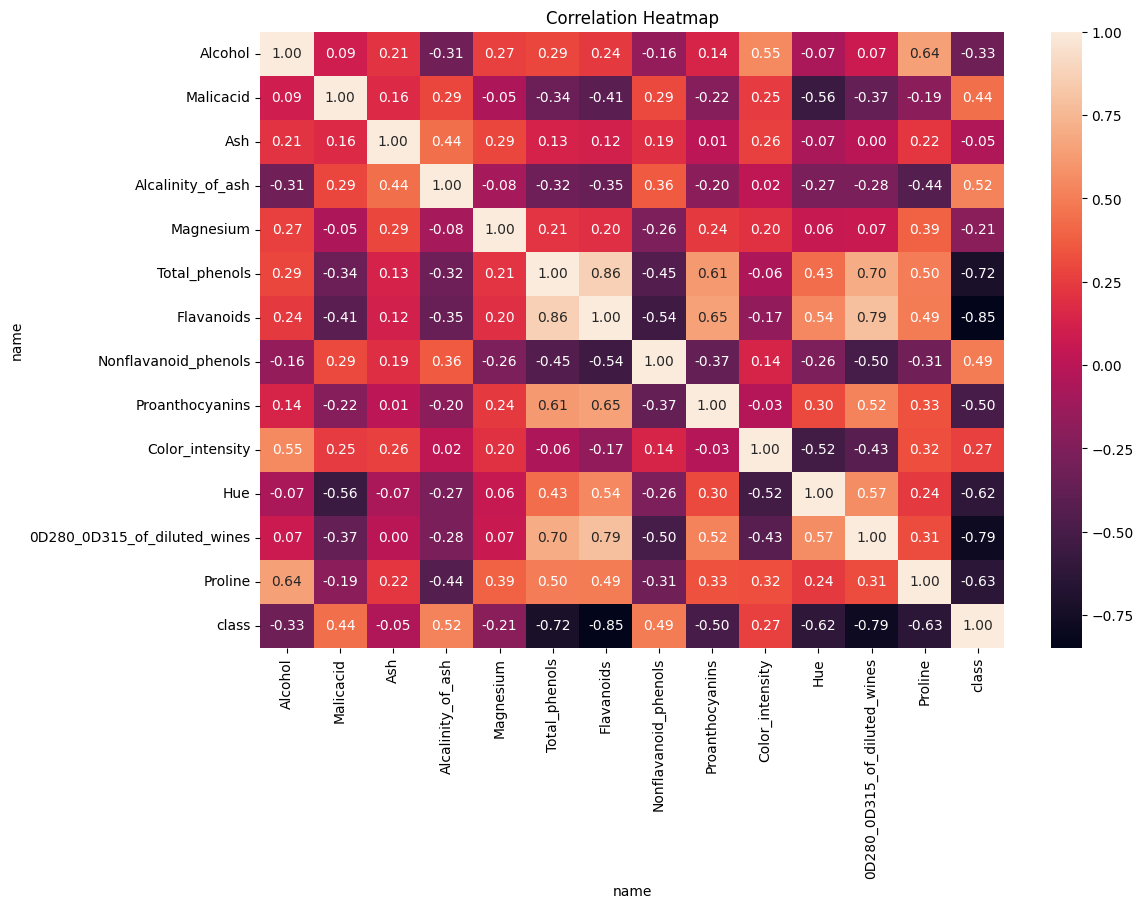

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine.corr(), annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Conclusion**

Linear Regression is a fundamental technique in data analysis that is used to model the relationship between a dependent variable and one or more independent variables. The aim of linear regression is to find the best line that fits the data, which can be used to make predictions or forecasts. Moreover, Linear regression can be used for a variety of purposes, including predictive modeling, forecasting, exploratory data analysis, and model selection. It is a versatile technique that can be used for a variety of applications, including sales forecasting, stock price predictions, and even weather forecasting. Logistic Regression on the other hand can be use to find answers to questions that have two or more finite outcomes. We can also use logistic regression to pre-process data such as sorting data with a large range of values like bank transactions into a smaller and finite range of values.